# Taller 


### Resolver los siguientes problemas, por el metodo de la biseccion, newton, punto fijo y secante, realizar una comparación del error como función del las numero de iteraciones


1. Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$


![Plano Inclinado](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig0.png)


2. Determinar el ángulo del sector circular que es igual a un cuarto del área de la circunferencia 


3. Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados


![fallas_vehiculo](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig2.png)


Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden




In [104]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image
from scipy import optimize
import pandas as pd

## Solución punto 1

Dada la ecuación: 

\begin{equation}
x = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2} -\sin\omega t\right)
\end{equation}

Se quiere resolver para $\omega$ conociendo los demás parámetros, luego la función a la cual se le desean calcular las raíces es:

\begin{equation}
f(\omega)=x +\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}-\sin\omega t\right) 
\end{equation}

Para implementar el método de Newton se debe calcular la derivada de la función, dada por:

\begin{equation}
f'(\omega)=-\frac{g}{\omega^3} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}-\sin\omega t\right) +\frac{gt}{2\omega^2} \left( \frac{e^{\omega t}+e^{-\omega t}}{2}-\cos\omega t\right)
\end{equation}

In [129]:
# Parámetros.
g=9.76
x=0.51
t=1.

# Definición de la función a la cual se le calcularán los ceros.
def f(w):
    return x+(g/(2.*w**2))*(((np.exp(w*t)-np.exp(-w*t))/2.)-np.sin(w*t))

# Definición de la derivada de la función para el método de Newton-Raphson (calculada analíticamente).
def fprime(w):
    return -(g/(w**3))*(((np.exp(w*t)-np.exp(-w*t))/2.)-np.sin(w*t))+(g/(2.*w**2))*(((np.exp(w*t)+np.exp(-w*t))/2.)-np.cos(w*t))

# Implementación de los métodos de solución de ecuaciones de la librería scipy, con una tolerancia de 1e-5.
root11,r11=optimize.bisect(f,-1,-0.1,xtol=1e-5,full_output=True)
root12=optimize.fixed_point(lambda x:x-f(x),-1,xtol=1e-5)
root13,r13=optimize.newton(f,-2,fprime,tol=1e-5,full_output=True)
root14,r14=optimize.newton(f,-2,tol=1e-5,full_output=True)

# Impresión de resultados.
print('RAÍCES CALCULADAS CON CADA MÉTODO')
print(f'Método de la bisección: {root11}, número de iteraciones: {r11.iterations}')

print('Método del punto fijo:', root12)

print(f'Método de Newton-Raphson: {root13}, número de iteraciones: {r13.iterations}')

print(f'Método de la secante: {root14}, número de iteraciones: {r14.iterations}')


RAÍCES CALCULADAS CON CADA MÉTODO
Método de la bisección: -0.3135261535644532, número de iteraciones: 17
Método del punto fijo: -0.3135209839265544
Método de Newton-Raphson: -0.31352098392658284, número de iteraciones: 3
Método de la secante: -0.3135209839267079, número de iteraciones: 4


Entre los métodos a los que se les puede obtener el número de iteraciones, es evidente que el de Newton-Raphson es el que converge más rápido, con 3 iteraciones; le sigue el de la secante, con 4 iteraciones; y, por último, el de la bisección, con 17 iteraciones. Al método del punto fijo no se le calcularon las iteraciones, debido a que el método implementado desde scipy no permite hacerlo.

In [105]:
optimize.fixed_point??

Signature:
optimize.fixed_point(
    func,
    x0,
    args=(),
    xtol=1e-08,
    maxiter=500,
    method='del2',
)
Source:   
def fixed_point(func, x0, args=(), xtol=1e-8, maxiter=500, method='del2'):
    """
    Find a fixed point of the function.

    Given a function of one or more variables and a starting point, find a
    fixed point of the function: i.e., where ``func(x0) == x0``.

    Parameters
    ----------
    func : function
        Function to evaluate.
    x0 : array_like
        Fixed point of function.
    args : tuple, optional
        Extra arguments to `func`.
    xtol : float, optional
        Convergence tolerance, defaults to 1e-08.
    maxiter : int, optional
        Maximum number of iterations, defaults to 500.
    method : {"del2", "iteration"}, optional
        Method of finding the fixed-point, defaults to "del2",
        which uses Steffensen's Method with Aitken's ``Del^2``
        convergence acceleration [1]_. The "iteration" method simply iterates
  

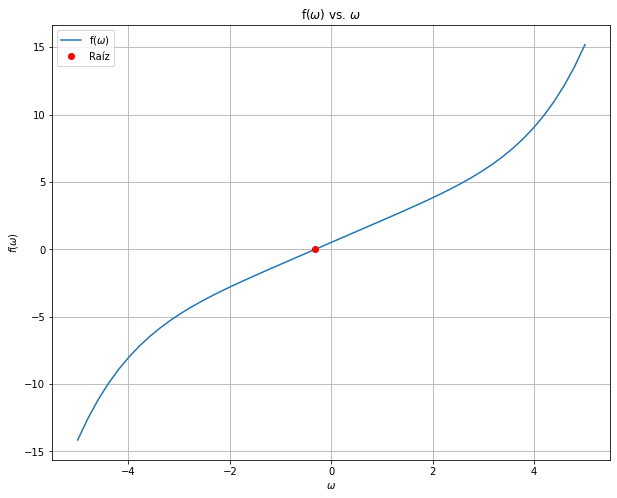

In [128]:
# Gráfica de la función con su raíz.

W=np.linspace(-5,5)
df=pd.DataFrame({'w':W, 'F':f(W)})

plt.figure(figsize=(10,8))
plt.plot(df.w,df.F,label=r'f($\omega$)')
plt.plot(-0.3135209839267079,0,'ro',label='Raíz')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$f(\omega)$')
plt.legend()
plt.title(r'f($\omega$) vs. $\omega$')
plt.grid()
plt.show()

## Solución punto 2

Sea el área de la circunferencia:

\begin{equation}
A_{circ}=\pi r^2
\end{equation}

Donde $r$ es el radio de la circunferencia. Se quiere encontrar el ángulo que subtiende un segmento circular para el cual el área sea exactamente un cuarto del área de la circunferencia, esto es:

\begin{equation}
A_{seg}=\frac{1}{4}A_{circ}
\end{equation}

El área del segmento circular se puede calcular como la resta del área del sector circular correspondiente y el área del triángulo isósceles formado por los dos radios que determinan el sector. Esto es:

\begin{equation}
A_{seg}=A_{sect}-A_{tri}=\frac{\theta}{2}r^2-\frac{1}{2}r^2\sin(\theta)=\frac{1}{4}\pi r^2\\
\theta-\sin(\theta)=\frac{\pi}{2}
\end{equation}

Luego, la función a la que se le quieren calcular las raíces es:

\begin{equation}
G(\theta)=\theta-\sin(\theta)-\frac{\pi}{2}
\end{equation}

Cuya derivada está dada por:

\begin{equation}
G'(\theta)=1-\cos(\theta)
\end{equation}

In [126]:
# Definición de la función a la cual se le calcularán los ceros.
def G(x):
    return x-np.sin(x)-np.pi/2

# Definición de la derivada de la función para el método de Newton-Raphson (calculada analíticamente).
def dG(x):
    return 1-np.cos(x)

# Implementación de los métodos de solución de ecuaciones de la librería scipy.
root21,r21=optimize.bisect(G,0,np.pi,full_output=True)
root22=optimize.fixed_point(lambda x:x-G(x),np.pi/2)
root23,r23=optimize.newton(G,np.pi,dG,full_output=True)
root24,r24=optimize.newton(G,np.pi,full_output=True)

# Impresión de resultados.
print('RAÍCES CALCULADAS CON CADA MÉTODO')
print(f'Método de la bisección: {root21}, número de iteraciones: {r21.iterations}')

print('Método del punto fijo:', root22)

print(f'Método de Newton-Raphson: {root23}, número de iteraciones: {r23.iterations}')

print(f'Método de la secante: {root24}, número de iteraciones: {r24.iterations}')

RAÍCES CALCULADAS CON CADA MÉTODO
Método de la bisección: 2.3098814600101703, número de iteraciones: 41
Método del punto fijo: 2.3098814600100575
Método de Newton-Raphson: 2.3098814600100575, número de iteraciones: 5
Método de la secante: 2.309881460010057, número de iteraciones: 6


Entre los métodos a los que se les puede obtener el número de iteraciones, es evidente que el de Newton-Raphson es, nuevamente, el que converge más rápido, con 5 iteraciones; le sigue el de la secante, con 6 iteraciones; y, por último, el de la bisección, con 41 iteraciones. Al método del punto fijo no se le calcularon las iteraciones, debido a que el método implementado desde scipy no permite hacerlo.

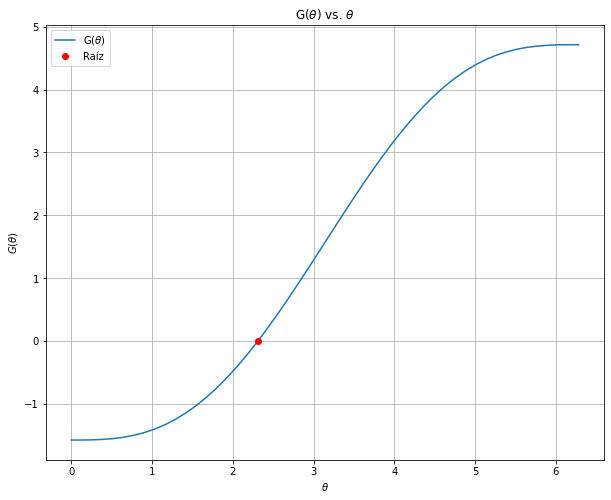

In [127]:
# Gráfica de la función con su raíz.
theta=np.linspace(0,2*np.pi)
df2=pd.DataFrame({'theta':theta, 'G':G(theta)})

plt.figure(figsize=(10,8))
plt.plot(df2.theta,df2.G,label=r'G($\theta$)')
plt.plot(root21,0,'ro',label='Raíz')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$G(\theta)$')
plt.legend()
plt.title(r'G($\theta$) vs. $\theta$')
plt.grid()
plt.show()

## Solución punto 3

Aquí, es evidente que la función a la que se le desean calcular los ceros está dada por:

\begin{equation}
H(\alpha)=A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)
\end{equation}

Donde:

\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}

Y además $\beta$, $h$, $D$ y $l$ son parámetros fijos.

La derivada de la función está dada por:

\begin{equation}
H'(\alpha)=A (\cos^2(\alpha)-\sin^2(\alpha))+2B \sin(\alpha)\cos(\alpha) + C \sin(\alpha) -  E  \cos(\alpha)
\end{equation}

In [167]:
#Parámetros.
l = 89
h = 49
D = 55
beta = np.deg2rad(11.5)

#Constantes de la función.
par=l * np.sin(beta), l * np.cos(beta),(h + 0.5 * D) * np.sin(beta) - 0.5 * D * np.tan(beta),(h + 0.5 * D) * np.cos(beta) - 0.5 * D

# Definición de la función a la cual se le calcularán los ceros.
def H(alpha,A,B,C,E):
    return A*np.sin(alpha)*np.cos(alpha)+B*np.sin(alpha)**2-C*np.cos(alpha)-E*np.sin(alpha)

# Definición de la derivada de la función para el método de Newton-Raphson (calculada analíticamente).
def dH(alpha,A,B,C,E):
    return A*(np.cos(alpha)**2-np.sin(alpha)**2)+2*B*np.sin(alpha)*np.cos(alpha)+C*np.sin(alpha)-E*np.cos(alpha)

# Implementación de los métodos de solución de ecuaciones de la librería scipy.
root31,r31=optimize.bisect(lambda x:H(x,*par),0,np.pi/4,full_output=True)
root32=optimize.fixed_point(lambda x:x-H(x,*par),0.57)
root33,r33=optimize.newton(lambda x:H(x,*par),np.pi/4,lambda x:dH(x,*par),full_output=True)
root34,r34=optimize.newton(lambda x:H(x,*par),np.pi/4,full_output=True)

# Impresión de resultados.
print('RAÍCES CALCULADAS CON CADA MÉTODO')
print(f'Método de la bisección: {root31}, número de iteraciones: {r31.iterations}')

print('Método del punto fijo:', root32)

print(f'Método de Newton-Raphson: {root33}, número de iteraciones: {r33.iterations}')

print(f'Método de la secante: {root34}, número de iteraciones: {r34.iterations}')

print(f'α={np.rad2deg(root34)}°')

RAÍCES CALCULADAS CON CADA MÉTODO
Método de la bisección: 0.5754730121937094, número de iteraciones: 39
Método del punto fijo: 0.5754730121943982
Método de Newton-Raphson: 0.575473012194399, número de iteraciones: 4
Método de la secante: 0.575473012194415, número de iteraciones: 5
α=32.97217482242054°


Entre los métodos a los que se les puede obtener el número de iteraciones, es evidente que el de Newton-Raphson es, nuevamente, el que converge más rápido, con 4 iteraciones; le sigue el de la secante, con 5 iteraciones; y, por último, el de la bisección, con 39 iteraciones. Al método del punto fijo no se le calcularon las iteraciones, debido a que el método implementado desde scipy no permite hacerlo. Nótese que el método del punto fijo es poco eficiente en esta situación, debido a que para que converja correctamente debe suponerse un $x_0$ muy cercano a la raíz real de la función (puede ver que modificando este valor, el método converge a un valor fuera de los límites físicos del problema).

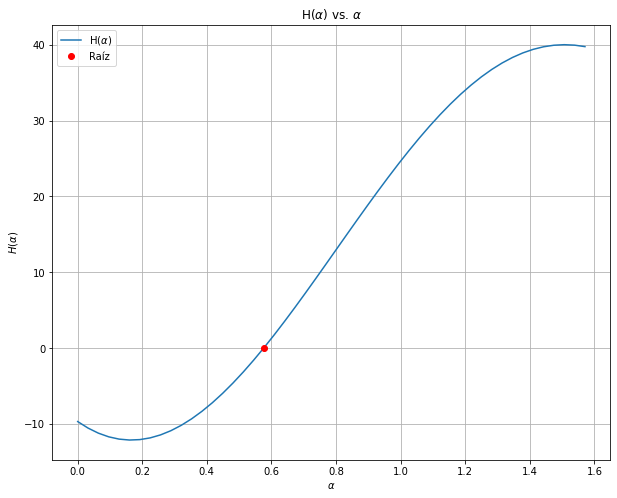

In [164]:
# Gráfica de la función con su raíz.
alpha=np.linspace(0,np.pi/2)
df3=pd.DataFrame({'alpha':alpha, 'H':H(alpha,*par)})

plt.figure(figsize=(10,8))
plt.plot(df3.alpha,df3.H,label=r'H($\alpha$)')

plt.plot(root31,0,'ro',label='Raíz')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$H(\alpha)$')
plt.legend()
plt.title(r'H($\alpha$) vs. $\alpha$')
plt.grid()
plt.show()




4. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

In [107]:
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin


In [108]:
#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  


In [109]:
a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


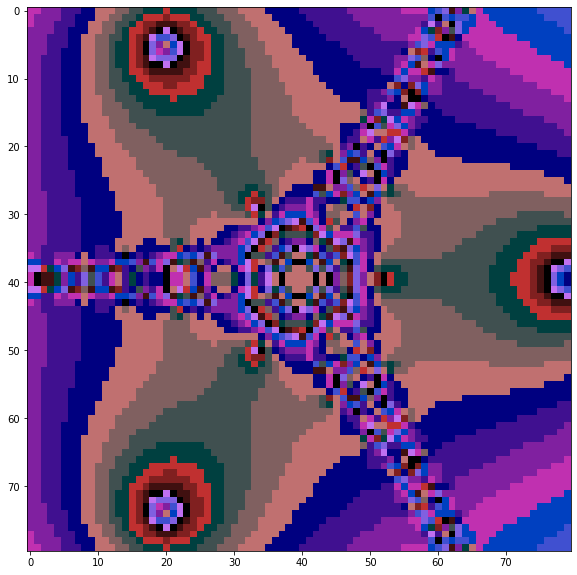

In [113]:
plt.figure(figsize=(10,10))
plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523)
